In [1]:
from classifiers import *
from helpers import*
from proj1_helpers import *
from preprocessing import preprocess
from validation import *
from plots import *

In [2]:
#load the goddamn data
y, x, ids_train = load_csv_data('../data/train.csv')
y_train, tx_train = preprocess(
            y, x, "NanToMean", standardize_=True
        )

In [3]:
#split the data into train and test:
x_train, y_train, x_test, y_test = split_data(x, y, 0.8, verbose=True, )
y_train = (y_train + 1)/2.
y_test = (y_test + 1)/2.
print('x_train, x_test:', x_train.shape, y_test.shape)
print('y_train, y_test:', y_train.shape, y_test.shape)
print('values of y_train', 'values of y_test', set(y_train), set(y_test))

ration:	 0.8
ratio of samples 1st subset:	 0.34
ratio of samples 2nd subset:	 0.34
x_train, x_test: (200000, 30) (50000,)
y_train, y_test: (200000,) (50000,)
values of y_train values of y_test {0.0, 1.0} {0.0, 1.0}


In [4]:
#experimenting with different gammas
gammas = [1e-4, 1e-3, 1e-6, 1e-7, 1e-8, 1e-9]
classifiers = []
for i in range(len(gammas)):
    print('Using gammas = ', gammas[i])
    clf = ClassifierLogisticRegression(
            lambda_=0,
            regularizer=None,
            gamma= gammas[i],
            max_iterations=200,
            min_max_iterations = 300,
            w_sampling_distr='uniform',
            threshold=0,
        )
    clf.train(y_train, x_train, batch_size=-1, verbose = True, tx_validation = x_test, y_validation = y_test, store_gradient=True, store_losses=True)
    classifiers += [clf]

Using gammas =  0.0001
Current iteration=0, loss=0.6090814605303826


c:\Users\fabri\Documents\GitHub\ml_projects\project1\scripts\utils.py:30: RuntimeWarning: overflow encountered in exp
  return 1./ (1+ np.exp(-t))


Current iteration=100, loss=0.6090814817515021
Using gammas =  0.001
Current iteration=0, loss=0.37232950249900276
Current iteration=100, loss=0.3723294948553728
Using gammas =  1e-06
Current iteration=0, loss=0.4872886270853676
Current iteration=100, loss=0.4872886271220566
Using gammas =  1e-07
Current iteration=0, loss=0.6277617541388515
Current iteration=100, loss=0.6277617541145586
Using gammas =  1e-08
Current iteration=0, loss=0.5257633754160543
Current iteration=100, loss=0.5257633754151969
Using gammas =  1e-09
Current iteration=0, loss=0.3701652794915661
Current iteration=100, loss=0.3701652794915507


In [13]:
selector = 6
training_plots(classifiers[selector])

IndexError: list index out of range

In [5]:
dictionary = clf.get_params_and_results(x_train, x_test, y_train, y_test)
print('accuracy_train', dictionary['accuracy_train'], 'accuracy test', dictionary['accuracy_test'])

accuracy_train 0.62977 accuracy test 0.62984


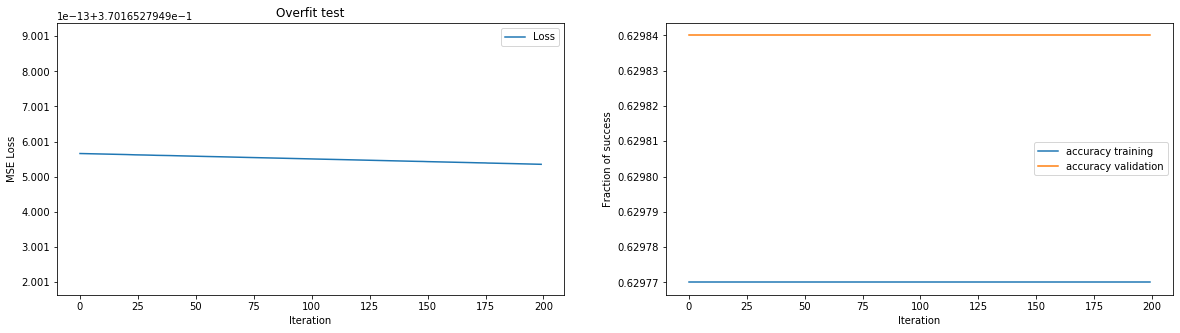

In [6]:
training_plots(clf)